In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
#import data table
data=pd.read_csv('HCV-Egy-Data.csv')

In [3]:
#check if all the values are imported correctly. data set has 1385 rows
len(data)

1385

In [4]:
#check types of attributes
#'gender' column: int type for 1=Male 2=Female
#from 'fever' column to 'epigastric pain' column: int type for 1=absent 2=present

data.dtypes

Age                                   int64
Gender                                int64
BMI                                   int64
Fever                                 int64
Nausea/Vomting                        int64
Headache                              int64
Diarrhea                              int64
Fatigue & generalized bone ache       int64
Jaundice                              int64
Epigastric pain                       int64
WBC                                   int64
RBC                                 float64
HGB                                   int64
Plat                                float64
AST 1                                 int64
ALT 1                                 int64
ALT4                                float64
ALT 12                                int64
ALT 24                                int64
ALT 36                                int64
ALT 48                                int64
ALT after 24 w                        int64
RNA Base                        

In [5]:
#value types are as expected
#up to what the data set is projected now, no missing values are detected (yet)
#however, the orginial table of data set (.csv file) displays 'RBC', 'Plat', 'ALT4' as integer values (no floating point)
#so checking again to make sure these 3 columns contain all float values

In [6]:
data['RBC'].apply(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
1380    <class 'float'>
1381    <class 'float'>
1382    <class 'float'>
1383    <class 'float'>
1384    <class 'float'>
Name: RBC, Length: 1385, dtype: object

In [7]:
data['Plat'].apply(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
1380    <class 'float'>
1381    <class 'float'>
1382    <class 'float'>
1383    <class 'float'>
1384    <class 'float'>
Name: Plat, Length: 1385, dtype: object

In [8]:
data['ALT4'].apply(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
1380    <class 'float'>
1381    <class 'float'>
1382    <class 'float'>
1383    <class 'float'>
1384    <class 'float'>
Name: ALT4, Length: 1385, dtype: object

In [9]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [10]:
#Rename attributes
data.columns=['Age','Gender','BMI','Fever','Nausea/Vomting','Headache','Diarrhea','Fatigue','Jaundice','Epigastric Pain',
              'WBC','RBC','HGB','Plat','AST 1','ALT 1','ALT 4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24w',
              'RNA Base','RNA 4','RNA 12','RNA EOT','RNA EF',
              'Baseline Histological Grading','Baseline Histological Staging']

In [11]:
#making a copy of the data set - preparing to make changes to the data set
#to make it suitable for the group's classfication problem
dataC=data.copy()

In [12]:
#decided to use 12 of those attributes in the data set
#Age, Gender, BMI, Fever, Nausea/Vomiting, Headache,
#Diarrhea, Fatigue & generalized bone ache, Jaundice,
#Epigastric pain, Baseline histological Grading, and Baseline histological Staging
#delete columns: from WBC -> RNA EF (index 10->27)
dataC.drop(dataC.iloc[:, 10:27], axis = 1, inplace = True)

In [13]:
dataC.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice,Epigastric Pain,Baseline Histological Grading,Baseline Histological Staging
0,56,1,35,2,1,1,1,2,2,2,13,2
1,46,1,29,1,2,2,1,2,2,1,4,2
2,57,1,33,2,2,2,2,1,1,1,4,4
3,49,2,33,1,2,1,2,1,2,1,10,3
4,59,1,32,1,1,2,1,2,2,2,11,1


In [14]:
#Change the data type to correct form - in this case integer -> category type for
#'gender': category type Male = 1 & Female = 2
dataC['Gender'] = dataC['Gender'].apply({1:'Male', 2:'Female'}.get)

In [15]:
#from 'fever' column to 'epigastric pain' column: Absent = 1 & Present = 2
for col in (dataC.iloc[:,3:10]):
    dataC[col] = dataC[col].apply({1:'Absent', 2:'Present'}.get)

In [16]:
dataC.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice,Epigastric Pain,Baseline Histological Grading,Baseline Histological Staging
0,56,Male,35,Present,Absent,Absent,Absent,Present,Present,Present,13,2
1,46,Male,29,Absent,Present,Present,Absent,Present,Present,Absent,4,2
2,57,Male,33,Present,Present,Present,Present,Absent,Absent,Absent,4,4
3,49,Female,33,Absent,Present,Absent,Present,Absent,Present,Absent,10,3
4,59,Male,32,Absent,Absent,Present,Absent,Present,Present,Present,11,1


In [17]:
#Set above values to category
dataC['Gender'] = dataC['Gender'].astype('category')
for col in (dataC.iloc[:,3:10]):
    dataC[col] = dataC[col].astype('category')

In [18]:
dataC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            1385 non-null   int64   
 1   Gender                         1385 non-null   category
 2   BMI                            1385 non-null   int64   
 3   Fever                          1385 non-null   category
 4   Nausea/Vomting                 1385 non-null   category
 5   Headache                       1385 non-null   category
 6   Diarrhea                       1385 non-null   category
 7   Fatigue                        1385 non-null   category
 8   Jaundice                       1385 non-null   category
 9   Epigastric Pain                1385 non-null   category
 10  Baseline Histological Grading  1385 non-null   int64   
 11  Baseline Histological Staging  1385 non-null   int64   
dtypes: category(8), int64(4)
memory us

In [19]:
#unable to make connection between baseline histological grading values
#with the rest of the data so drop this column from the target data set
dataC.drop('Baseline Histological Grading', axis = 1, inplace = True)

In [20]:
dataC.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice,Epigastric Pain,Baseline Histological Staging
0,56,Male,35,Present,Absent,Absent,Absent,Present,Present,Present,2
1,46,Male,29,Absent,Present,Present,Absent,Present,Present,Absent,2
2,57,Male,33,Present,Present,Present,Present,Absent,Absent,Absent,4
3,49,Female,33,Absent,Present,Absent,Present,Absent,Present,Absent,3
4,59,Male,32,Absent,Absent,Present,Absent,Present,Present,Present,1


In [21]:
dataC.describe()

,Age,BMI,Baseline Histological Staging
count,1385.000000,1385.000000,1385.000000
mean,46.319134,28.608664,2.536462
std,8.781506,4.076215,1.121392
min,32.000000,22.000000,1.000000
25%,39.000000,25.000000,2.000000
50%,46.000000,29.000000,3.000000
75%,54.000000,32.000000,4.000000
max,61.000000,35.000000,4.000000


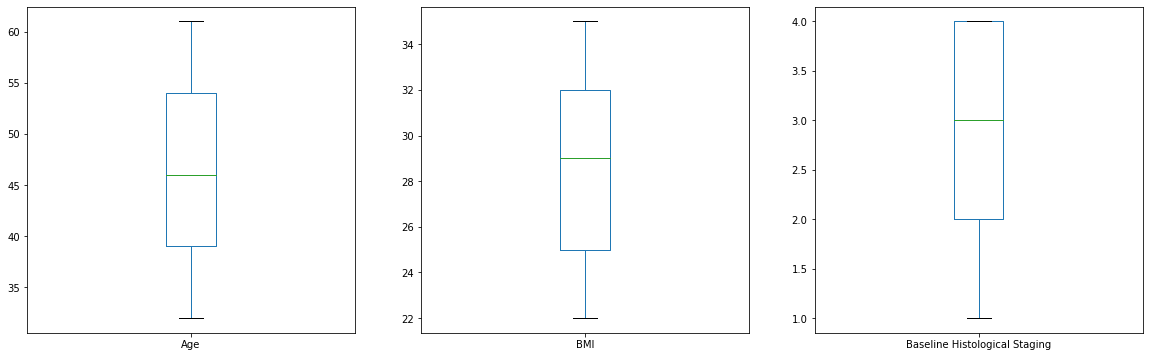

In [30]:
#Boxplot for numeric values in the data set of both genders (Age, BMI, and Basline Histological Staging)
dataC.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20,6))
plt.show()

In [26]:
#From the Age boxplot, ages of both genders fall around 20-70 years old
#Set up the ageRange column to draw bar plot
#showing the age range group by gender of the data set
bins=[20,30,40,50,60,70,80]
labels=['less than 30','30-39','40-49','50-59','60-69','70+']
dataC["Age Range"]=pd.cut(dataC.Age,bins,labels=labels,include_lowest=True)

In [27]:
ageRgen=dataC.groupby(['Age Range','Gender'])

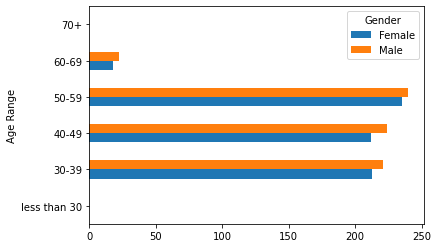

In [33]:
#Bar graph by age range for both genders
ageRgen.size().unstack().plot(kind='barh')

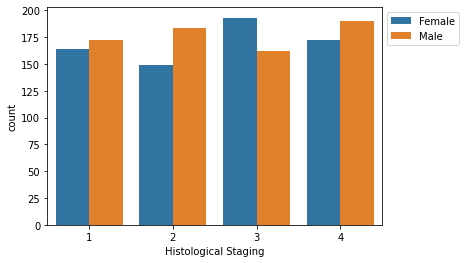

In [38]:
#Baseline Histological Staging across each gender
sns.countplot(x=data['Baseline Histological Staging'], hue=dataC['Gender'])
plt.xlabel('Histological Staging')
plt.legend(bbox_to_anchor=(1,1))
plt.show()